# **KAWACH 1.0- AI AGENT KAWACH (Knowledge-based Advanced Watchdog for Authentication, Cybersecurity, and Heuristics)**
An all-in-one digital shield for secure transactions, identity protection, real-time threat detection and AI-powered fraud Detection and Prevention System for the Digital Payment Channel


**1) Fake Payment Links (Phishing Scams & Smishing Scams):** Fraudsters often send fake payment links through SMS, email, or WhatsApp, which redirect victims to counterfeit websites designed to mimic UPI apps; when victims enter their personal PIN on these fake sites, scammers gain unauthorized access to their bank accounts.



**2) Vishing (Voice Phishing):** Scammers use phone calls pretending to be from banks, government agencies, or customer support to trick victims into revealing sensitive information.



**3) Request Money Scam:** Scammers posing as buyers trick victims into entering their UPI PIN to "accept" a payment request, which actually results in the victim unknowingly sending money instead of receiving it.



**4) Fake Customer Care Numbers:**  Fraudsters post fake customer care numbers online, and when users call, they are tricked into revealing sensitive information like UPI PIN, OTP, or card details.



**5) Remote Access Scams:**  Scammers trick users into downloading screen-sharing apps like AnyDesk or TeamViewer, then monitor their screen as they enter UPI or mobile banking credentials, resulting in financial fraud.



**6) QR Code Scam:** Fraudsters send QR codes claiming they will credit money, but scanning them actually results in money being debited from your account.



**7) Loan & Cashback Fraud:**  Scammers lure victims with fake loan or cashback offers, then ask for an initial payment or OTP to process the claim, and disappear once the payment is made.




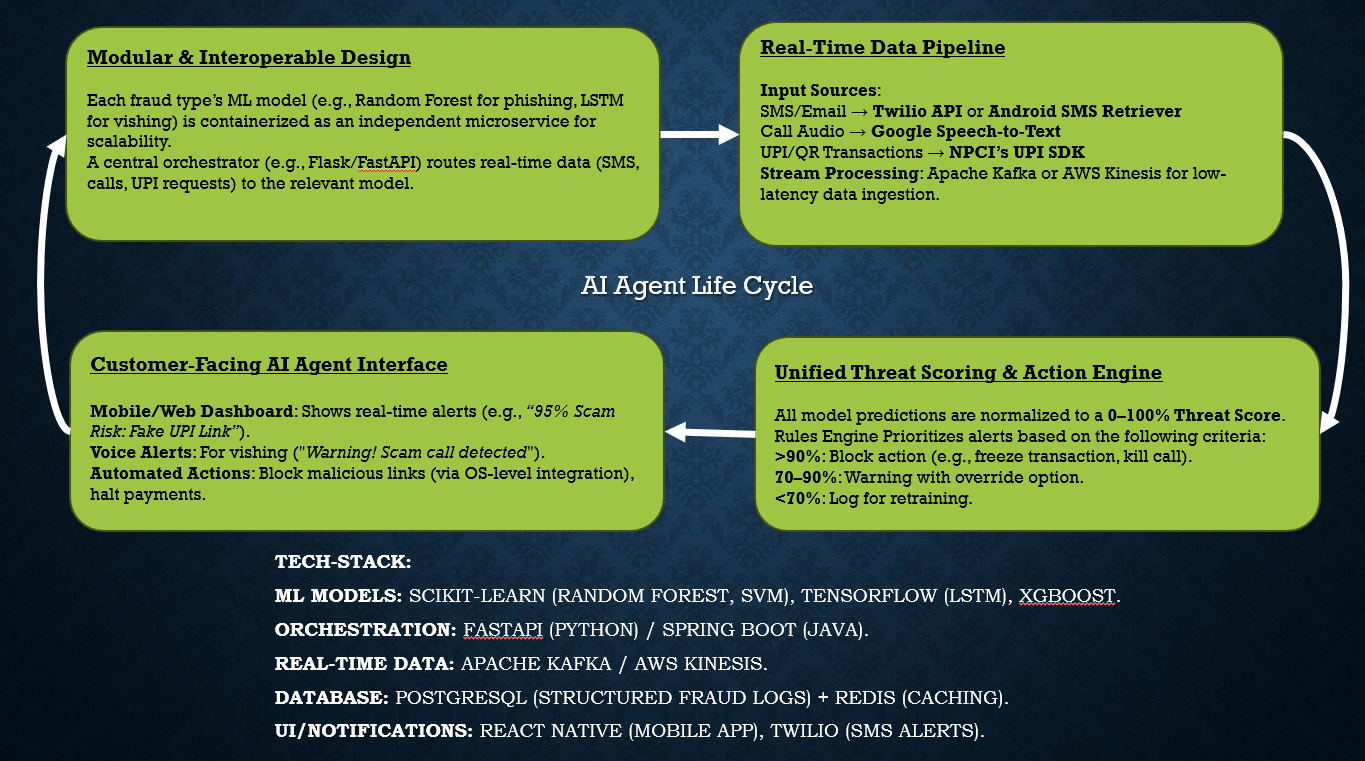

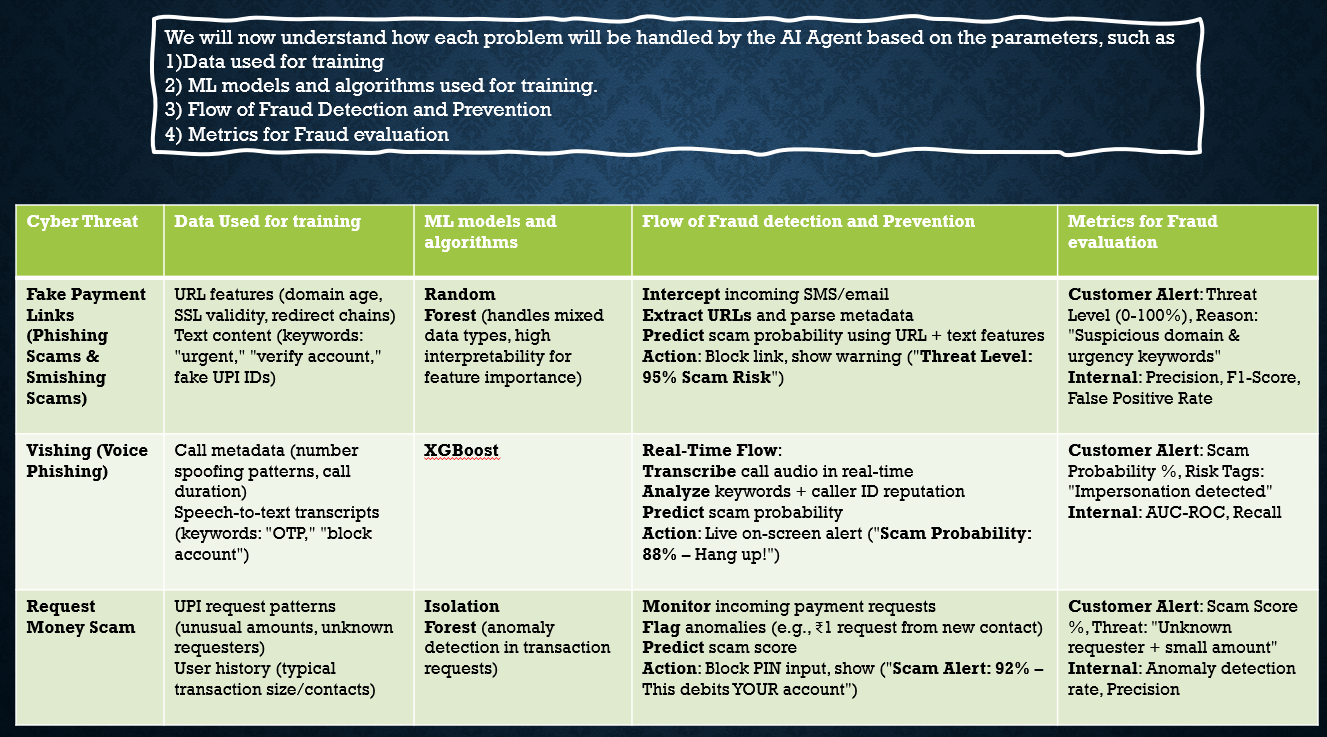

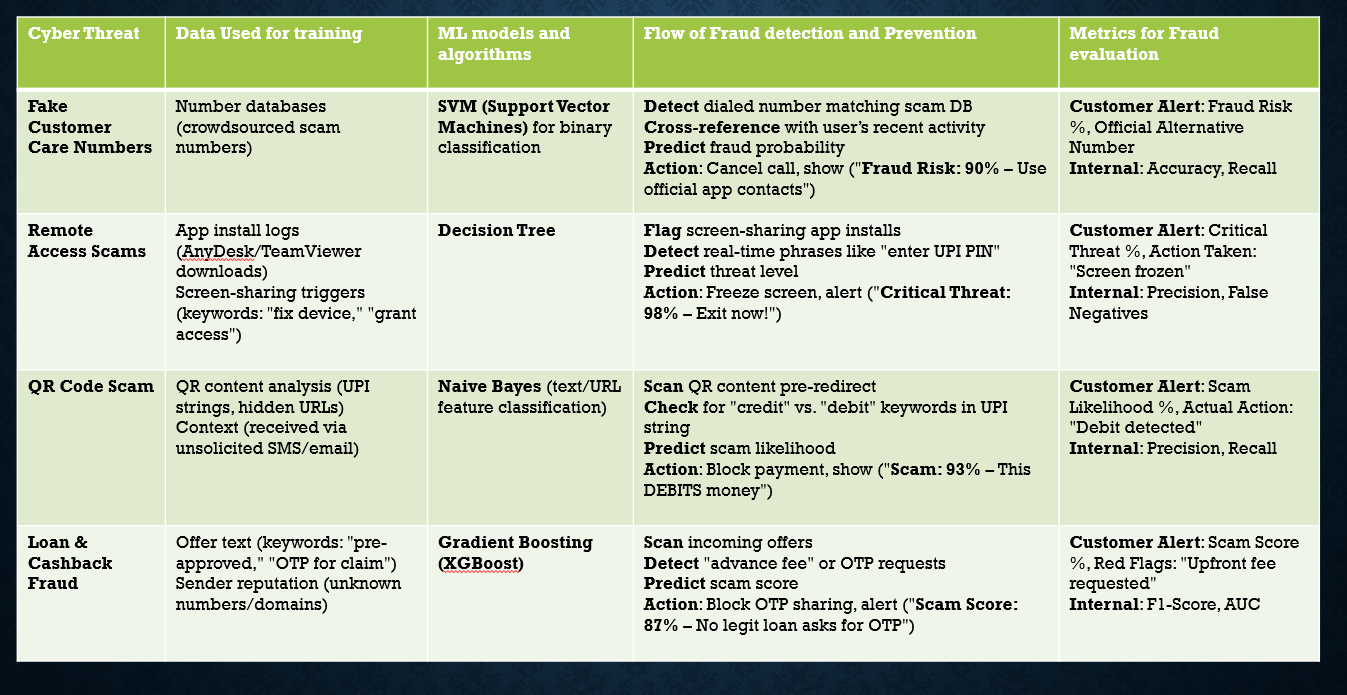

# **All these models and algorithms will be packaged together and the single entity is referred to as an AI agent, which will perform all tasks in real time, analyze all data received, and flag them as fraud or safe methods or requests.**

install required libraries, frameworks and modules

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from google.colab import files
import pandas as pd
import re
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

the Ai agent will actively analyse all the payment links. It will analyse the domain of the links that whether are they from an authorized organisation, bank of body or from some unkown body.

It will analyse on parameters such as how amny redirect links are there, the type of text sent along with the link which will be scenned with the NLP algorithms and based on cumullative factor it will predict whetjer the payment link is fraud one or not.

In [12]:
file_path = "/content/fraud_detection_dataset.xlsx"  # Example path in Colab

# Load the data
df = pd.read_excel(file_path)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
def clean_text(text):
    text = str(text).lower()  ## convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  ## remove special characters
    return text
df['text_with_link'] = df['text_with_link'].apply(clean_text)
df['urgent_present'] = df['text_with_link'].str.contains('urgent|immediate|alert', regex=True).astype(int)
df['keyword_verify'] = df['text_with_link'].str.contains('verify|update|secure|password', regex=True).astype(int)
X = df[['text_with_link', 'no_of_redirects', 'urgent_present', 'keyword_verify']]
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# NLP pipeline for text
text_transformer = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=500, stop_words='english'))
])
preprocessor = ColumnTransformer([
    ('text', text_transformer, 'text_with_link'),
    ('numeric', 'passthrough', ['no_of_redirects', 'urgent_present', 'keyword_verify'])
])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   stop_words='english'))]),
                                                  'text_with_link'),
                                                 ('numeric', 'passthrough',
                                                  ['no_of_redirects',
                                                   'urgent_present',
                                                   'keyword_verify'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [15]:
y_pred = model.predict(X_test)
# Calculate metrics
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"False Positive Rate: {fpr:.2f}")

Precision: 1.00
F1-Score: 1.00
False Positive Rate: 0.00


AI agent will actively listen the conversation over the call, convert this voice conversation into text analyse each segemnt of conversation along with factors such as phone no, location, no of times the call was received in past etc and based on it will predict whether the call u just received was a fraud one or not.

Data integrity and security will be maintained via edge computing techniques, so that voice converation data remins on the device itself and doesnt go in any cloud destination.

In [18]:
vishing_file = "/content/vishing_calls_dataset.xlsx"  # .xlsx or .xls
df = pd.read_excel(vishing_file)

# Clean text data
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['call_metadata'] = df['call_metadata'].apply(clean_text)
# Feature Engineering
df['is_unknown_caller'] = df['domain_name'].str.contains('Unknown|Raj K|Agent|Loan', regex=True).astype(int)
df['urgency_keywords'] = df['call_metadata'].str.contains('block|OTP|verify|urgent|cashback|won', regex=True).astype(int)
#df['bank_mismatch'] = (~df['email'].str.contains(df['domain_name'].str.replace(' ', ''), case=False)).astype(int)
df['is_fraud'] = (df['fraud_percent'] >= 50).astype(int)
features = ['is_unknown_caller', 'urgency_keywords', 'calls_received_history', 'call_metadata']
X = df[features]
y = df['is_fraud']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from xgboost import XGBClassifier
# NLP for call metadata
text_transformer = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=200, stop_words='english'))
])
preprocessor = ColumnTransformer([
    ('text', text_transformer, 'call_metadata'),
    ('numeric', 'passthrough', ['is_unknown_caller', 'urgency_keywords', 'calls_received_history'])
])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=2))  # Handle class imbalance
])

# Train
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=200,
                                                                                   stop_words='english'))]),
                                                  'call_metadata'),
                                                 ('numeric', 'passthrough',
                                                  ['is_unknown_caller',
                                                   'urgency_keywords',
                                                   'calls_received_history'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [21]:
y_pred = model.predict(X_test)
# Metrics
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"False Positive Rate: {fpr:.2f}")

Precision: 1.00
F1-Score: 1.00
False Positive Rate (FPR): 0.00


UPI Money request Scam

AI gent will first understand what is the purpose of the money request sent by someone over upi. It will analyse has the user done any transaction with the requester in past, what is the average amount the user has always sent over upi transactions(if the amount demanded is very huge than the request can be blocked or flagged).

it will also see if any prior warning was sent by the requester for money request. because authorized body sending upi requests for money generally intimate once before hand via email or sms.

In [22]:
def preprocess_data(df):
    # Convert categorical features
    df['Requester_Type'] = df['Requester_Organisation'].apply(
        lambda x: 1 if x in ['Official Bank', 'Government Org'] else 0
    )
    df['Hour'] = pd.to_datetime(df['Demand_Time']).dt.hour
    df['Is_Off_Hours'] = ((df['Hour'] < 8) | (df['Hour'] > 20)).astype(int)
    df['Urgency_Keywords'] = df['Request_Message'].str.contains(
        'urgent|emergency|now|immediate', regex=True, case=False
    ).astype(int)
    df['Is_Fraud'] = df['Fraud_Request'].map({'Yes': 1, 'No': 0})

    return df

# Example usage
df = pd.read_csv('/content/upi_money_request_dataset.csv')  # Replace with your file
df = preprocess_data(df)
features = [
    'Amount_Demanded',
    'User_Avg_Monthly_Transaction',
    'Prev_Txns_With_Requester',
    'Requester_Type',
    'Is_Off_Hours',
    'Urgency_Keywords'
]
X = df[features]

/tmp/ipython-input-22-1266110861.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Demand_Time']).dt.hour


In [23]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
model = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    random_state=42
)
model.fit(X_train)

# Predict anomalies (-1 for anomaly, 1 for normal)
y_pred = model.predict(X_test)
df_test = X_test.copy()
df_test['Is_Fraud_Pred'] = [1 if x == -1 else 0 for x in y_pred]  # Convert to 1/0

In [24]:
if 'Is_Fraud' in df_test:
    print(classification_report(
        df_test['Is_Fraud'],
        df_test['Is_Fraud_Pred'],
        target_names=['Legitimate', 'Fraud']
    ))

# Key metrics for unsupervised approach
n_anomalies = sum(df_test['Is_Fraud_Pred'] == 1)
print(f"Detected Anomalies: {n_anomalies}/{len(df_test)} ({n_anomalies/len(df_test):.1%})")

Detected Anomalies: 7/40 (17.5%)


QR Code Scam

Its seen that QR codes can be malacious one. The Ai agent will scan the qr code and check for the patterns and design associated with original ones and frauds one and based on them it will cluster the sent qr in fraud one or safe one.

For this the agent will move on to CNN models

In [ ]:
train_dir = 'qr_dataset'
img_size = (128, 128)  # Resize all QR codes to 128x128 pixels
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1
)

# Load datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (malicious vs legitimate)
    subset='training'
)
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

In [ ]:
model = Sequential([
    # Feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Classification
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  ## to reduce overfitting
    Dense(1, activation='sigmoid')  # Output: 0 (legitimate) or 1 (malicious)
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
epochs = 10
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(val_data)
print(f"Test Accuracy: {test_acc:.2%}")